# Lasso and Ridge Regression
##### First use Linear Regression to predict automobile prices. Then apply Lasso and Ridge Regression models on the same data and compare results

In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

0.20.3


### Download the Automobile data set
<b>Download link:</b> https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

<b>Summary:</b> Predict the price of a vehicle given other information about it

<b>Parameters: </b> <br />
1st argument is the location of the file (not necessarily a csv file) <br />
<b>sep</b> specifies the separator, which can also be expressed as a regular expression. Here we trim whitespaces around the commas<br />
<b>engine</b> represents the parsing engine. The values are <i>c</i> and <i>python</i>. The C engine is marginally faster but Python may offer more features 

In [3]:
auto_data = pd.read_csv('../data/imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


#### Fill missing values with NaN

In [4]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Information about numeric fields in our dataframe
Note that the automobile price is not present

In [5]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Information about all fields in our dataframe

In [6]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,16500
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### Data Cleaning
Also called data cleansing. Involves identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

#### What data type is price?

In [7]:
auto_data['price'].describe()

count       201
unique      186
top       16500
freq          2
Name: price, dtype: object

#### Convert the values in the price column to numeric values
If conversion throws an error set to NaN (by setting errors='coerce')

In [8]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') 

In [9]:
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

#### Dropping a column which we deem unnecessary

In [10]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [11]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


#### Horsepower is also non-numeric...

In [12]:
auto_data['horsepower'].describe()

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

#### ...so this is also converted to a numeric value

In [13]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce') 

In [14]:
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [15]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

#### Since there are only 7 unique values, we can explicitly set the corresponding numeric values

In [16]:
cylinders_dict = {'two': 2, 
                  'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)

auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


#### All other non-numeric fields can be made into usable features by applying one-hot-encoding

In [17]:
auto_data = pd.get_dummies(auto_data, 
                           columns=['make', 
                                    'fuel-type', 
                                    'aspiration', 
                                    'num-of-doors', 
                                    'body-style', 
                                    'drive-wheels', 
                                    'engine-location', 
                                    'engine-type', 
                                    'fuel-system'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


#### Drop rows containing missing values

In [18]:
auto_data = auto_data.dropna()
auto_data

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.4,...,0,0,0,0,0,0,0,1,0,0
10,2,101.2,176.8,64.8,54.3,2395,4,108,3.5,2.8,...,0,0,0,0,0,0,0,1,0,0


#### Verify that there are no null values in the data set

In [19]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


### Data Cleaning is now complete
We can now use our data to build our models

#### Create training and test data using train_test_split

In [20]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

# Taking the labels (price)
Y = auto_data['price']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Create a LinearRegression model with our training data

In [21]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Check R-square on training data

In [22]:
linear_model.score(X_train, Y_train)

0.96792273709243304

#### View coefficients for each feature

In [23]:
linear_model.coef_

array([ -5.80061464e+02,   3.06874682e+02,  -1.06499194e+02,
         1.52236727e+02,  -5.05771408e+02,   5.30902624e+00,
        -4.15988710e+03,   2.82885047e+02,  -1.75044342e+04,
        -4.49860407e+03,  -1.59555122e+03,  -4.82296063e+01,
         2.15673623e+00,  -6.79852969e+01,   1.73362582e+02,
        -3.74284422e+03,   3.71721668e+03,   6.86565908e+03,
        -4.12474818e+03,  -4.48093478e+03,  -2.94555422e+02,
        -4.74283895e+03,   3.47319261e+03,  -4.08732786e+02,
         3.02841192e+03,   2.30284405e+03,  -4.71448781e+03,
        -6.67651176e+02,  -8.40276958e+03,  -5.25933085e+03,
         1.04713265e+04,  -1.81898940e-11,   8.36042927e+03,
        -4.81543507e+02,  -2.06062392e+03,   6.21153583e+01,
         1.09986569e+03,   6.06615966e+03,  -6.06615966e+03,
        -1.38232301e+03,   1.38232301e+03,   3.37569880e+03,
         3.28229109e+03,   2.99875643e+03,  -1.00643481e+03,
        -1.20820627e+03,  -3.92414032e+02,  -3.91701310e+02,
        -4.99487338e+02,

#### A better view of the coefficients
List of features and their coefficients, ordered by coefficient value

In [24]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

bore                     -1.750443e+04
make_peugot              -8.402770e+03
fuel-type_gas            -6.066160e+03
make_plymouth            -5.259331e+03
make_isuzu               -4.742839e+03
make_mitsubishi          -4.714488e+03
stroke                   -4.498604e+03
make_dodge               -4.480935e+03
num-of-cylinders         -4.159887e+03
make_chevrolet           -4.124748e+03
fuel-system_1bbl         -3.853127e+03
make_alfa-romero         -3.742844e+03
engine-type_ohcv         -3.683859e+03
engine-location_front    -2.467485e+03
fuel-system_spdi         -2.062660e+03
make_toyota              -2.060624e+03
fuel-system_mfi          -1.734487e+03
compression-ratio        -1.595551e+03
aspiration_std           -1.382323e+03
body-style_hatchback     -1.208206e+03
body-style_hardtop       -1.006435e+03
engine-type_ohc          -9.808996e+02
fuel-system_mpfi         -7.374698e+02
make_nissan              -6.676512e+02
drive-wheels_fwd         -6.591405e+02
symboling                

#### Make predictions on test data

In [25]:
y_predict = linear_model.predict(x_test)

#### Compare predicted and actual values of Price

Populating the interactive namespace from numpy and matplotlib


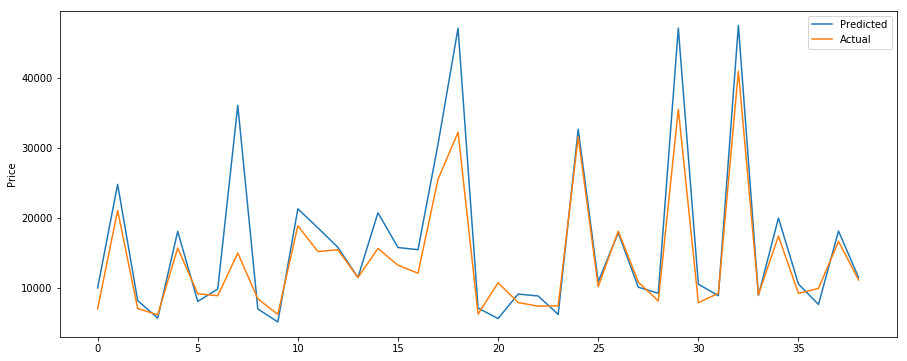

In [26]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### R-square score
For our model, how well do the features describe the price?

In [27]:
r_square = linear_model.score(x_test, y_test)
r_square

0.63225834161155436

#### Calculate Mean Square Error

In [28]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

26099937.604351308

#### Root of Mean Square Error

In [29]:
import math

math.sqrt(linear_model_mse)

5108.809803109851

### Lasso Regression
Cost Function: RSS + <b>&alpha;</b>*(sum of absolute values of coefficients)

RSS = Residual Sum of Squares

Larger values of <b>&alpha;</b> should result in smaller coefficients as the cost function needs to be minimized

In [30]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5, normalize=True)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### Check R-square on training data

In [31]:
lasso_model.score(X_train, Y_train)

0.96510812725275497

#### Coefficients when using Lasso

In [32]:
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

bore                     -9.092176e+03
make_peugot              -6.467778e+03
make_jaguar              -6.193545e+03
engine-location_front    -4.537584e+03
engine-type_ohcv         -4.223274e+03
make_plymouth            -3.546019e+03
stroke                   -3.543804e+03
make_dodge               -3.152300e+03
make_mitsubishi          -3.142282e+03
make_chevrolet           -2.942939e+03
make_isuzu               -2.910845e+03
aspiration_std           -2.498593e+03
fuel-system_1bbl         -2.184594e+03
num-of-cylinders         -1.361323e+03
make_toyota              -1.303444e+03
engine-type_dohc         -1.156469e+03
drive-wheels_fwd         -9.650933e+02
symboling                -5.782481e+02
make_nissan              -5.647727e+02
compression-ratio        -3.531524e+02
height                   -3.477801e+02
body-style_hatchback     -3.119457e+02
make_alfa-romero         -2.269308e+02
body-style_hardtop       -1.024258e+02
length                   -8.684394e+01
fuel-system_spdi         

#### Make predictions on test data

In [33]:
y_predict = lasso_model.predict(x_test)

#### Compare predicted and actual values of Price

Populating the interactive namespace from numpy and matplotlib


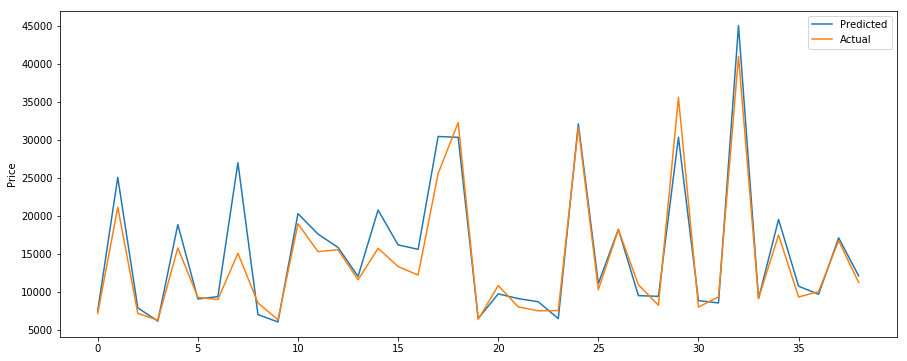

In [34]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Check R-square value on test data

In [35]:
r_square = lasso_model.score(x_test, y_test)
r_square

0.887194953444848

#### Is the root mean square error any better?

In [36]:
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

2829.518800848219

### Ridge Regression
Cost Function: RSS + <b>&alpha;</b>*(sum of squares of coefficients)

RSS = Residual Sum of Squares

Larger values of α should result in smaller coefficients as the cost function needs to be minimized

Ridge Regression penalizes large coefficients even more than Lasso as coefficients are squared in cost function

In [37]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.05, normalize=True)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

#### Check R-square on training  data

In [38]:
ridge_model.score(X_train, Y_train)

0.95382480356425681

#### Coefficients when using Ridge

In [39]:
coef = pd.Series(ridge_model.coef_,predictors).sort_values()
print(coef)

make_jaguar              -4721.702089
engine-location_front    -3375.974878
make_peugot              -3042.959224
make_isuzu               -2186.005015
engine-type_ohcv         -2070.071555
make_mercury             -1886.420238
make_plymouth            -1866.358266
make_mitsubishi          -1849.750707
make_dodge               -1424.482791
make_toyota              -1217.908816
make_nissan              -1136.396198
make_subaru              -1125.402397
fuel-system_1bbl         -1029.775416
stroke                    -923.794701
fuel-system_mfi           -895.203607
aspiration_std            -803.283234
engine-type_dohc          -721.693473
bore                      -596.120417
drive-wheels_fwd          -572.601182
body-style_wagon          -512.619400
fuel-system_spdi          -408.012399
fuel-type_gas             -330.762925
symboling                 -290.993542
body-style_hatchback      -288.551757
make_volvo                -175.881081
fuel-system_mpfi          -115.001771
height      

#### Make predictions on test data

In [40]:
y_predict = ridge_model.predict(x_test)

#### Compare predicted and actual values of Price

Populating the interactive namespace from numpy and matplotlib


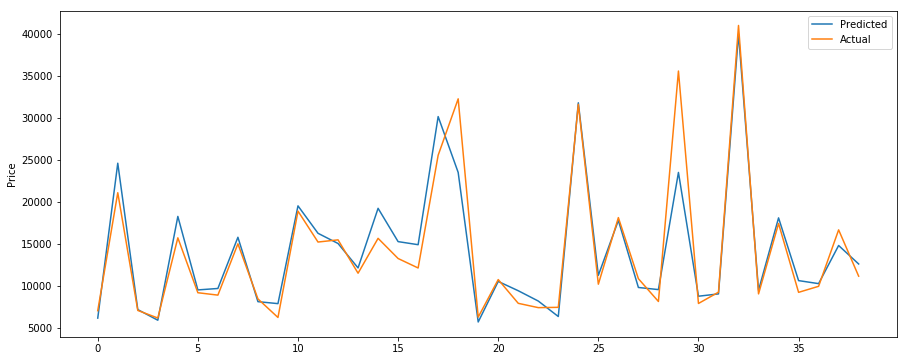

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Get R-square value for test data

In [42]:
r_square = ridge_model.score(x_test, y_test)
r_square

0.88756630341654985

In [43]:
ridge_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(ridge_model_mse)

2824.857626833396

### Apply SVR on this data set

In [44]:
from sklearn.svm import SVR

regression_model = SVR(kernel='linear', C=1.0)
regression_model.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### R-square on training data

In [45]:
regression_model.score(X_train, Y_train)

0.76018106031622446

In [46]:
coef = pd.Series(regression_model.coef_[0], predictors).sort_values()
print(coef)

body-style_hatchback     -15.913994
drive-wheels_fwd         -10.684989
make_mitsubishi           -9.000000
fuel-system_spdi          -8.000000
stroke                    -7.631257
body-style_wagon          -6.000000
make_subaru               -4.806859
num-of-doors_two          -4.625734
make_toyota               -4.000000
make_plymouth             -4.000000
engine-type_ohcv          -3.940745
fuel-system_1bbl          -3.000000
engine-location_front     -3.000000
make_isuzu                -2.000000
make_nissan               -2.000000
engine-type_ohcf          -1.806859
make_honda                -1.770995
aspiration_std            -1.625734
fuel-type_gas             -1.518599
make_peugot               -1.481401
bore                      -1.480885
fuel-system_mfi           -1.000000
make_mercury              -1.000000
fuel-system_spfi          -1.000000
make_jaguar               -0.940745
engine-type_l             -0.481401
fuel-system_4bbl           0.000000
make_dodge                 0

In [47]:
y_predict = regression_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


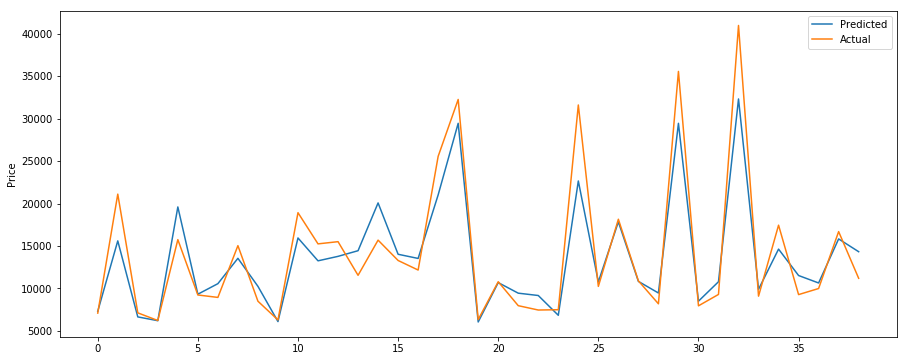

In [48]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### R-square on test data

In [49]:
r_square = regression_model.score(x_test, y_test)
r_square

0.87194002879123578

In [50]:
regression_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(regression_model_mse)

3014.775792136513